In [1]:
import os
import pandas as pd
import numpy as np
import math
from skimage import io
from collections import Counter
from matplotlib import pyplot as plt
from glob import glob

In [2]:
ROOT_DIR = os.path.abspath("../../")

In [16]:
def getInfoClassesSamples(DS_DIR = "/"):
    for (dirpath, u_dirnames, filenames) in os.walk(DS_DIR):
        dirnames = sorted(u_dirnames)
        print("DIRECTORY: {}".format(str(DS_DIR)))  
        nclasses = len(dirnames)
        #print("# CLASSES: {}".format(str(nclasses))) 
        samples_list = []        
        heights_list = []        
        widths_list = []        
        channels_list = []
        sizes_list = []
        
        for i in range(len(dirnames)):
            FILE_DIR = os.path.join(DS_DIR, str(dirnames[i]))
            samples = glob(FILE_DIR+'/*.*') 
            samples_list.append(len(samples))  
            for j in range (len(samples)):
                #print(samples[j])
                img = io.imread(samples[j])
                heights_list.append(img.shape[0])
                widths_list.append(img.shape[1])
                if len(img.shape) > 2 :
                    channels_list.append(img.shape[2])
                sizes_list.append(int(math.sqrt(img.shape[0] * img.shape[1])))
        
        fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(17,6))
        plt.subplots_adjust(hspace = 0.5)
        plt.subplots_adjust(wspace = 0.25)
        fig.suptitle('CLASSES {} - SAMPLES {}'.format(nclasses, sum(samples_list)))
        
        ### SAMPLES PER CLASS DISTRIBUTION
        #print(sorted(samples_list))
        '''print("Samples per class")
        print("-> Min: {}".format(min(samples_list)))
        print("-> Max: {}".format(max(samples_list)))'''
        decile = lambda x: x // 50 * 50 # bins of 50 images each
        histo_samples = Counter(decile(sample) for sample in samples_list)
        #print(histo_samples)
        '''plt.bar([x+25 for x in histo_samples.keys()], histo_samples.values(), 40)
        plt.axis([0,max(samples_list)+50, 0,histo_samples.most_common(1)[0][1]+10])
        plt.xticks([50 * i for i in range((max(samples_list)//50)+1)])
        plt.xlabel("# of Samples")
        plt.ylabel("# of Classes")
        plt.title("Samples per class distribution: {} classes".format(nclasses))
        plt.show'''
        ax1.bar([x+25 for x in histo_samples.keys()], histo_samples.values(), 40)
        ax1.set_xlim([0,max(samples_list)+50])
        ax1.set_ylim([0,histo_samples.most_common(1)[0][1]+10])
        ax1.set_xticks([50 * i for i in range((max(samples_list)//50)+1)])
        ax1.set_title('Samples per class')
        ax1.set_xlabel("# of Samples")
        ax1.set_ylabel("# of Classes")
        
        ### SIZE IMAGES DISTRIBUTION 
        #print(sorted(sizes_list))
        '''print("Images size")
        print("-> Min: {}".format(min(sizes_list)))
        print("-> Max: {}".format(max(sizes_list)))'''
        #decile = lambda x: x // 50 * 50 # bins of 1000 pixelsize each
        histo_sizes = Counter(decile(size) for size in sizes_list)
        '''plt.figure(figsize=(15,5))
        plt.bar([x+25 for x in histo_sizes.keys()], histo_sizes.values(), 40)
        plt.axis([0,max(sizes_list)+50, 0,histo_sizes.most_common(1)[0][1]+50])
        plt.xticks([50 * i for i in range((max(sizes_list)//50)+1)])
        plt.xlabel("Image sizes")
        plt.ylabel("# of Images")
        plt.title("Image size distribution: {} images".format(sum(samples_list)))
        plt.show'''
        ax4.bar([x+25 for x in histo_sizes.keys()], histo_sizes.values(), 40)
        ax4.set_xlim([0,max(sizes_list)+50])
        ax4.set_ylim([0,histo_sizes.most_common(1)[0][1]+1000])
        ax4.set_xticks([50 * i for i in range((max(sizes_list)//50)+1)])
        ax4.set_title('Image size (sqrt(area))')
        ax4.set_xlabel('Image sizes')
        ax4.set_ylabel("# of Images")
        
        
        ### HIGHT IMAGES DISTRIBUTION
        #decile = lambda x: x // 50 * 50 # bins of 50 images each
        histo_hights = Counter(decile(hight) for hight in heights_list)
        '''plt.figure(figsize=(15,5))
        plt.bar([x+25 for x in histo_hights.keys()], histo_hights.values(), 40)
        plt.axis([0,max(heights_list)+50, 0,histo_hights.most_common(1)[0][1]+10])
        plt.xticks([50 * i for i in range((max(heights_list)//50)+1)])
        plt.xlabel("Image hights")
        plt.ylabel("# of Images")
        plt.title("Image high distribution: {} images".format(sum(samples_list)))
        plt.show'''
        ax5.bar([x+25 for x in histo_hights.keys()], histo_hights.values(), 40)
        ax5.set_xlim([0,max(heights_list)+50])
        ax5.set_ylim([0,histo_hights.most_common(1)[0][1]+1000])
        ax5.set_xticks([50 * i for i in range((max(heights_list)//50)+1)])
        ax5.set_title('Image high')
        ax5.set_xlabel('high')
        ax5.set_ylabel("# of images")
        
        ### WIDTH IMAGES DISTRIBUTION
        #decile = lambda x: x // 50 * 50 # bins of 50 images each
        histo_width = Counter(decile(width) for width in widths_list)
        '''plt.figure(figsize=(15,5))
        plt.bar([x+25 for x in histo_width.keys()], histo_width.values(), 40)
        plt.axis([0,max(widths_list)+50, 0,histo_width.most_common(1)[0][1]+10])
        plt.xticks([50 * i for i in range((max(widths_list)//50)+1)])
        plt.xlabel("Image widths")
        plt.ylabel("# of Images")
        plt.title("Image width distribution: {} images".format(sum(samples_list)))
        plt.show'''
        ax2.bar([x+25 for x in histo_width.keys()], histo_width.values(), 40)
        ax2.set_xlim([0,max(widths_list)+50])
        ax2.set_ylim([0,histo_width.most_common(1)[0][1]+1000])
        ax2.set_xticks([50 * i for i in range((max(widths_list)//50)+1)])
        ax2.set_title('Image width')
        ax2.set_xlabel('width')
        ax2.set_ylabel("# of images")
        
        ### HIGH / WIDTH RATIO
        histo_ratio = Counter(np.around((np.array(heights_list)/np.array(widths_list)),1))
        #plt.bar([x for x in histo_ratio.keys()], histo_ratio.values(), 0.1)
        #plt.axis([0,4,0,histo_ratio.most_common(1)[0][1]+10])        
        #plt.xticks([50 * i for i in range((max(samples_list)//50)+1)])
        #plt.xlabel("H/W ratio")
        #plt.ylabel("# of Samples")
        #plt.title("High/Width Ratio: {} classes".format(nclasses))
        #plt.show
        ax3.bar([x for x in histo_ratio.keys()], histo_ratio.values(), 0.08)
        ax3.set_title('High/Width ratio')
        ax3.set_xlabel('ratio')
        ax3.set_ylabel('# of images')
        
        
        ### CHANNELS IMAGES DISTRIBUTION
        histo_channels = Counter(channels_list)
        #print("histo_channels {}".format(histo_channels))
        '''plt.bar([x for x in histo_channels.keys()], histo_channels.values(), 0.8)
        plt.axis([0,4, 0,histo_channels.most_common(1)[0][1]+100])
        plt.xticks([1,2,3])
        plt.xlabel("Image channels")
        plt.ylabel("# of Images")
        plt.title("Image channels distribution: {} images".format(sum(samples_list)))
        plt.show'''
        ax6.bar([x for x in histo_channels.keys()], histo_channels.values(), 0.8)
        ax6.set_xlim([1,5])
        ax6.set_ylim([0,histo_channels.most_common(1)[0][1]+1000])
        ax6.set_xticks([2,3,4])
        ax6.set_title('Image channels')
        ax6.set_xlabel('channels')
        ax6.set_ylabel('# of images')
        
        break


DIRECTORY: /home/sol/Sol/MCS/AllDatasets/UERC/Dataset/TrainData166Class/


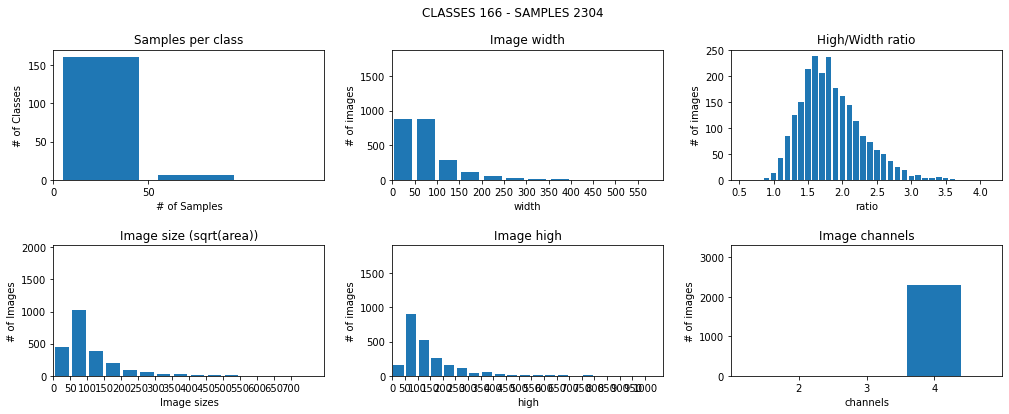

In [17]:
DSDIR = os.path.join(ROOT_DIR, "AllDatasets/UERC/Dataset/TrainData166Class/")
getInfoClassesSamples(DS_DIR = DSDIR)

DIRECTORY: /home/sol/Sol/MCS/AllDatasets/UERC/Dataset/TestData180Class/


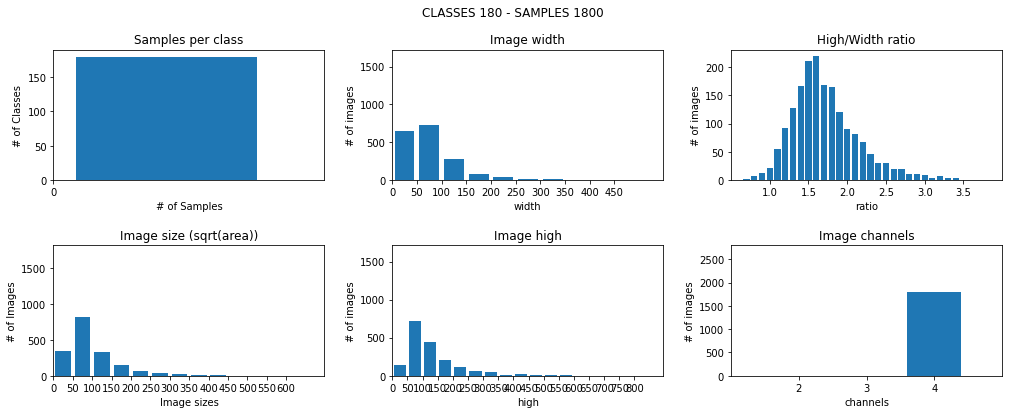

In [141]:
DSDIR = os.path.join(ROOT_DIR, "AllDatasets/UERC/Dataset/TestData180Class/")
getInfoClassesSamples(DS_DIR = DSDIR)

DIRECTORY: /home/sol/Sol/MCS/AllDatasets/VGGFace_Detected/A/


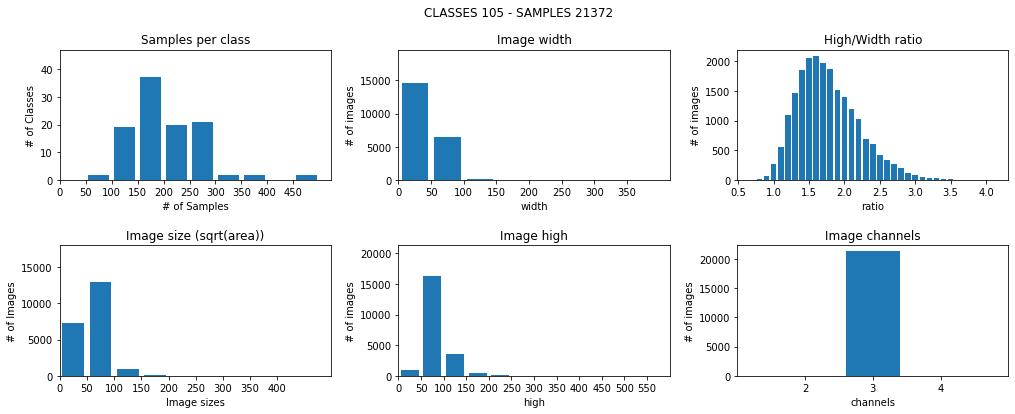

In [135]:
DSDIR = os.path.join(ROOT_DIR, "AllDatasets/VGGFace_Detected/A/")
getInfoClassesSamples(DS_DIR = DSDIR)

DIRECTORY: /home/sol/Sol/MCS/AllDatasets/VGGFace_Detected/B/


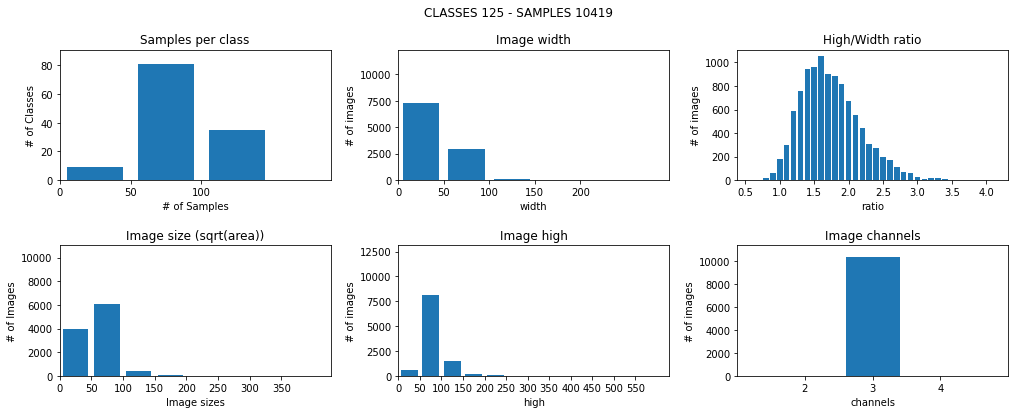

In [136]:
DSDIR = os.path.join(ROOT_DIR, "AllDatasets/VGGFace_Detected/B/")
getInfoClassesSamples(DS_DIR = DSDIR)

DIRECTORY: /home/sol/Sol/MCS/AllDatasets/VGGFace_Detected/C/


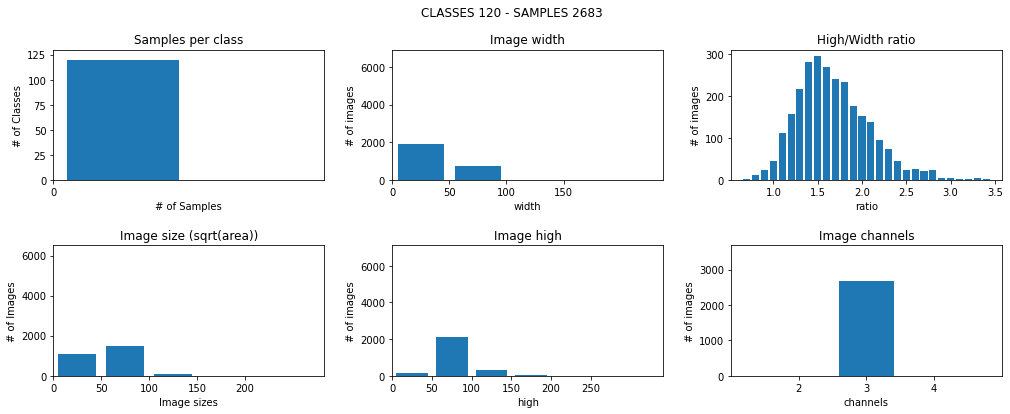

In [137]:
DSDIR = os.path.join(ROOT_DIR, "AllDatasets/VGGFace_Detected/C/")
getInfoClassesSamples(DS_DIR = DSDIR)

DIRECTORY: /home/sol/Sol/MCS/AllDatasets/WPUT/


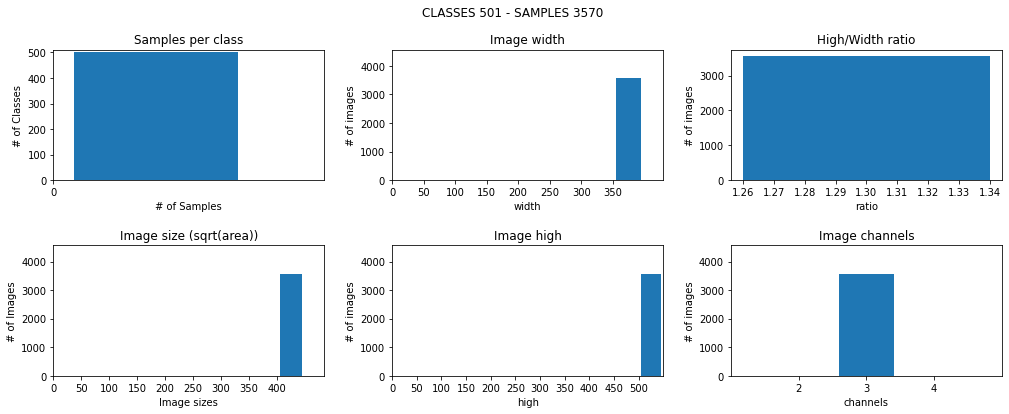

In [4]:
DSDIR = os.path.join(ROOT_DIR, "AllDatasets/WPUT/")
getInfoClassesSamples(DS_DIR = DSDIR)

DIRECTORY: /home/sol/Sol/MCS/AllDatasets/AMI/


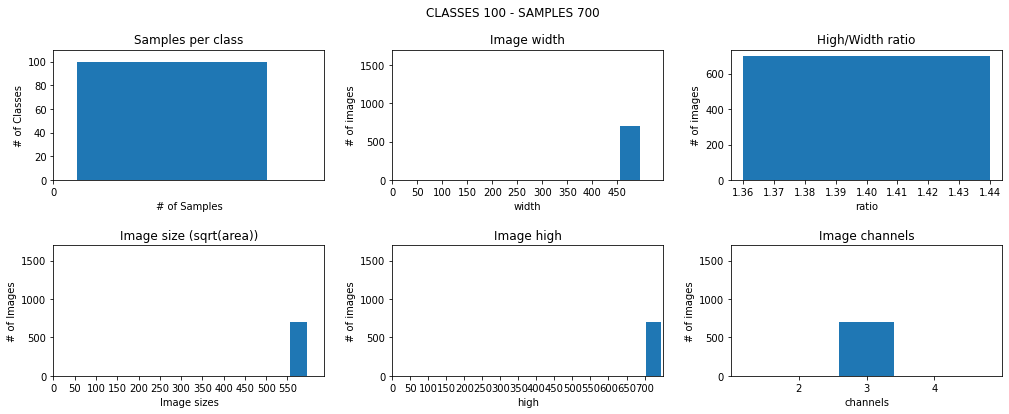

In [5]:
DSDIR = os.path.join(ROOT_DIR, "AllDatasets/AMI/")
getInfoClassesSamples(DS_DIR = DSDIR)

DIRECTORY: /home/sol/Sol/MCS/AllDatasets/AWEDataset/


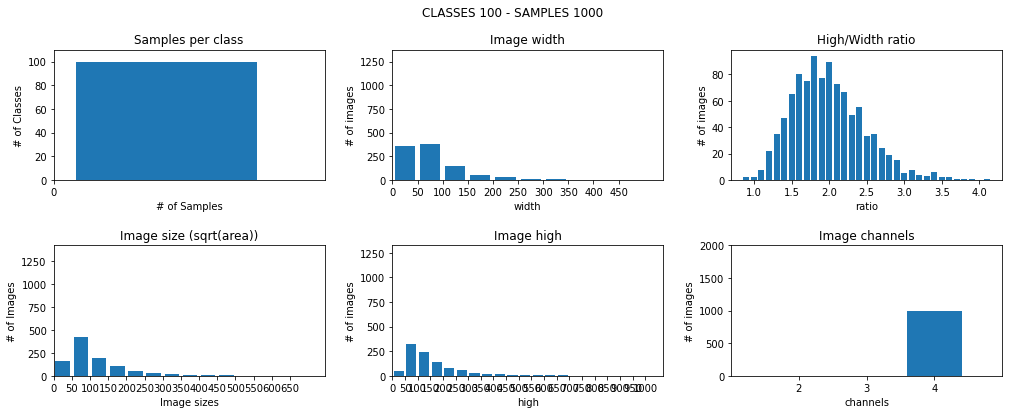

In [12]:
DSDIR = os.path.join(ROOT_DIR, "AllDatasets/AWEDataset/")
getInfoClassesSamples(DS_DIR = DSDIR)

In [5]:
from glob import glob
samples = glob("/home/sol/Documentos/MCS/LocalThesisProject/AllDatasets/Faces/VGGFace2/testito/n009175/*.*") 
max(samples)

113

In [21]:
a = [1,74,5,9,6,40,5,9,81,2,3,2,1,4,5,9,70]
c = Counter([1,74,5,9,6,40,5,9,81,2,3,2,1,4,5,9,70])
c

Counter({1: 2, 74: 1, 5: 3, 9: 3, 6: 1, 40: 1, 81: 1, 2: 2, 3: 1, 4: 1, 70: 1})

In [60]:
c.most_common(1)[0][1]

3

In [96]:
img = io.imread("/home/sol/Documentos/MCS/LocalThesisProject/AllDatasets/Faces/VGGFace2/train_TODO/n000002/0011_01.jpg", as_gray=False)
img.shape

(307, 231, 3)

In [98]:

    print("yes")


yes


In [119]:
sum(a)

326

In [150]:
import math
math.sqrt(9)

3.0